In [18]:
import os
import pybullet_envs
import numpy as np
import matplotlib.pyplot as plt
# import panda_gym # Not in requirements, required for panda envs, get latest from here: https://github.com/qgallouedec/panda-gym , don't use version from pypy 

from seagul.zoo3_utils import load_zoo_agent, ALGOS, do_rollout_stable
from seagul.mesh import dict_to_array
import pandas as pd

path_to_zoo = "/home/sgillen/work/external/rl-baselines3-zoo/" # Very hacky but this is what we do for now. use: git clone --recursive https://github.com/DLR-RM/rl-baselines3-zoo

#model_dir = os.path.abspath('') + "/keep_agents/bullet_works_rewards/" # Bullet envs with mdim and cdim rewards
#model_dir = os.path.abspath('../') + "/keep_agents/default_post_01_001/" # Bullet with no extra reward, just policy refinement with ARS  
#model_dir = os.path.abspath('../') + "/keep_agents/panda0/"
#model_dir = os.path.abspath('') + "/test_agent/panda_actor/"
#model_dir = os.path.abspath('../') + "/keep_agents/bullet_nopost_02_0025/"
#model_dir = os.path.abspath('') + "/keep_agents/bullet_ddpg_a2c/"

#model_dir = os.path.abspath('') + "/test_agents/pendulum_br/"
#model_dir = os.path.abspath('') + "/test_agent/panda_seeded"

model_dir = os.path.abspath('')  + "/keep_agents/panda_adim1"

csv_file = os.path.abspath('')  + "/keep_csv/panda_adim1.csv"
df = pd.read_csv(csv_file)[['post', 'config.algo', 'config.env_name', 'ureward_mean', 'ureward_std', 'mdim_mean', 'cdim_mean', 'cdim_std', 'mdim_nan_mean', 'mdim_std', 'nreward_mean', 'nreward_std', 'len_mean',
                             'cdim_nan_mean']]#, 'config.post']]

df = df.loc[df['config.env_name'] != 'PandaStack-v1']

df['avgdim_mean'] = df[['mdim_mean', 'cdim_mean']].mean(axis=1)
df['avgdim_std'] = df[['mdim_std', 'cdim_std']].mean(axis=1)

In [23]:
df2 = pd.DataFrame()

post_dict = {}
for post in df['post']:
    post_dict[post] = 1 
    
# for post in post_dict.keys():
#     display(df[df['post'] == post])
    
#for post in post_dict.keys():
post_name = 'DualRewardProd_adim_safe_stable_nolen'
env_disp_name = "Environment"
algo_disp_name = "Algorithm"

#df2 = df[(df['post'] == 'iden') | (df['post'] == 'DualRewardDiv_cdim_safe_stable_nolen')]
#df2.set_index(['config.env_name', 'config.algo'])


df2[env_disp_name] = df[df['post'] == 'iden']['config.env_name']
df2[algo_disp_name] = df[df['post'] == 'iden']['config.algo']
df2['bdim_mean'] = df[df['post'] == 'iden']['avgdim_mean']
df2['bdim_std'] = df[df['post'] == 'iden']['avgdim_std']
df2['adim_mean'] = df[df['post'] == post_name]['avgdim_mean'].to_numpy()
df2['adim_std'] = df[df['post'] == post_name]['avgdim_std'].to_numpy()

df2['brew_mean'] = df[df['post'] == 'iden']['ureward_mean']
df2['brew_std'] = df[df['post'] == 'iden']['ureward_std']
df2['arew_mean'] = df[df['post'] == post_name]['ureward_mean'].to_numpy()
df2['arew_std'] = df[df['post'] == post_name]['ureward_std'].to_numpy()

df2 = df2.round({'bdim_mean':2,'bdim_std':1,'adim_mean':2, "adim_std":1})
df2['bdim_mean'] = df2['bdim_mean']
df2['bdim_mean'] = df2[['bdim_mean', 'bdim_std']].astype(str).agg(' ± '.join, axis=1) 
df2.drop('bdim_std', axis=1, inplace=True)
df2['adim_mean'] = df2['adim_mean']
df2['adim_mean'] = df2[['adim_mean', 'adim_std']].astype(str).agg(' ± '.join, axis=1) 

df2 = df2.round({'brew_mean':2,'brew_std':1,'arew_mean':2, "arew_std":1})
df2['brew_mean'] = df2['brew_mean'].astype(int)
df2['brew_mean'] = df2[['brew_mean', 'brew_std']].astype(str).agg(' ± '.join, axis=1) 
df2.drop('brew_std', axis=1, inplace=True)
df2['arew_mean'] = df2['arew_mean'].astype(int)
df2['arew_mean'] = df2[['arew_mean', 'arew_std']].astype(str).agg(' ± '.join, axis=1) 

df2.drop('adim_std', axis=1, inplace=True)
df2 = df2.rename({'bdim_mean':'Baseline Dim.'}, axis=1)
df2 = df2.rename({'adim_mean':'Refined  Dim.'}, axis=1)

df2.drop('arew_std', axis=1, inplace=True)
df2 = df2.rename({'brew_mean':'Baseline Return'}, axis=1)
df2 = df2.rename({'arew_mean':'Refined  Return'}, axis=1)

df2.set_index(["Environment", "Algorithm"]).sort_index()

env_dict = {}
for env in df2['Environment']:
    env_dict[env] = 1 

df2.drop("Algorithm", axis=1, inplace=True)
print(df2.to_latex(index=False))
# for post in ['iden', 'DualRewardDiv_cdim_safe_stable_nolen']:
#     dfp = df[df['post'] == post]
#     print(post)
#     dfd = dfp.drop('post', axis=1, inplace=False)
#     display(dfd)

\begin{tabular}{lllll}
\toprule
          Environment & Baseline Dim. & Refined  Dim. & Baseline Return & Refined  Return \\
\midrule
        PandaReach-v1 &    2.73 ± 0.7 &    2.28 ± 0.5 &        -2 ± 0.6 &        -1 ± 0.7 \\
 PandaPickAndPlace-v1 &    1.63 ± 0.3 &    1.61 ± 0.5 &        -6 ± 2.6 &      -11 ± 13.3 \\
         PandaPush-v1 &    1.91 ± 0.5 &    1.68 ± 0.3 &        -6 ± 2.7 &        -7 ± 3.0 \\
        PandaSlide-v1 &    1.89 ± 0.4 &    1.53 ± 0.3 &       -22 ± 7.1 &      -41 ± 12.4 \\
\bottomrule
\end{tabular}



In [25]:
# Iterate through save directory and load everything

model_dict = {}
env_dict = {}

for algo_file in os.scandir(model_dir):
    algo_dir = algo_file.path
    algo = algo_dir.split("/")[-1]
    model_dict[algo] = {}
    env_dict[algo] = {}
    for env_file in os.scandir(algo_dir):
        env_dir = env_file.path
        env_name = env_dir.split("/")[-1]
        model_dict[algo][env_name] = {}
        env_dict[algo][env_name] = {}
        env, original_model = load_zoo_agent(env_name, algo, zoo_path = path_to_zoo)
        env_dict[algo][env_name] = env
        model_dict[algo][env_name]['original'] = original_model
        for pkl_file in os.scandir(env_dir):
            post_name = pkl_file.path.split("/")[-1].split(".")[0]
            model_dict[algo][env_name][post_name] = ALGOS[algo].load(pkl_file.path, env=env, device='cpu')

/home/sgillen/work/external/rl-baselines3-zoo//rl-trained-agents/tqc/PandaPickAndPlace-v1_1/PandaPickAndPlace-v1


/home/sgillen/anaconda3/envs/baselines/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


/home/sgillen/work/external/rl-baselines3-zoo//rl-trained-agents/tqc/PandaReach-v1_1/PandaReach-v1
Loading running average
with params: {'norm_obs': True, 'norm_reward': True}
/home/sgillen/work/external/rl-baselines3-zoo//rl-trained-agents/tqc/PandaPush-v1_1/PandaPush-v1
/home/sgillen/work/external/rl-baselines3-zoo//rl-trained-agents/tqc/PandaStack-v1_1/PandaStack-v1
/home/sgillen/work/external/rl-baselines3-zoo//rl-trained-agents/tqc/PandaSlide-v1_2/PandaSlide-v1


In [26]:
algo_list = list(model_dict.keys())
env_list = list(model_dict[algo_list[0]].keys())
post_list = list(model_dict[algo_list[0]][env_list[0]].keys())

print(algo_list) # Original Algorithm
print(env_list) # Environment

# Postprocessor, autogenerated names. "original" means the original agent from zoo without additional training, "postprocess_default" means just ARS with not extra reward.
# Any other name is some new reward functio 
print(post_list)

['tqc']
['PandaPickAndPlace-v1', 'PandaReach-v1', 'PandaPush-v1', 'PandaStack-v1', 'PandaSlide-v1']
['original', 'postprocess_default', 'DualRewardLin_act_squared', 'DualRewardProd_adim_safe_stable_nolen']


In [24]:
#env = env_dict['tqc']['PandaReach-v1']
#model = model_dict['tqc']['PandaReach-v1']['original']

#env = env_dict['tqc']['HopperBulletEnv-v0']
#model = model_dict['tqc']['HopperBulletEnv-v0'][post_list[0]]

KeyError: 'tqc'

Text(0.5, 0, 'Time (s)')

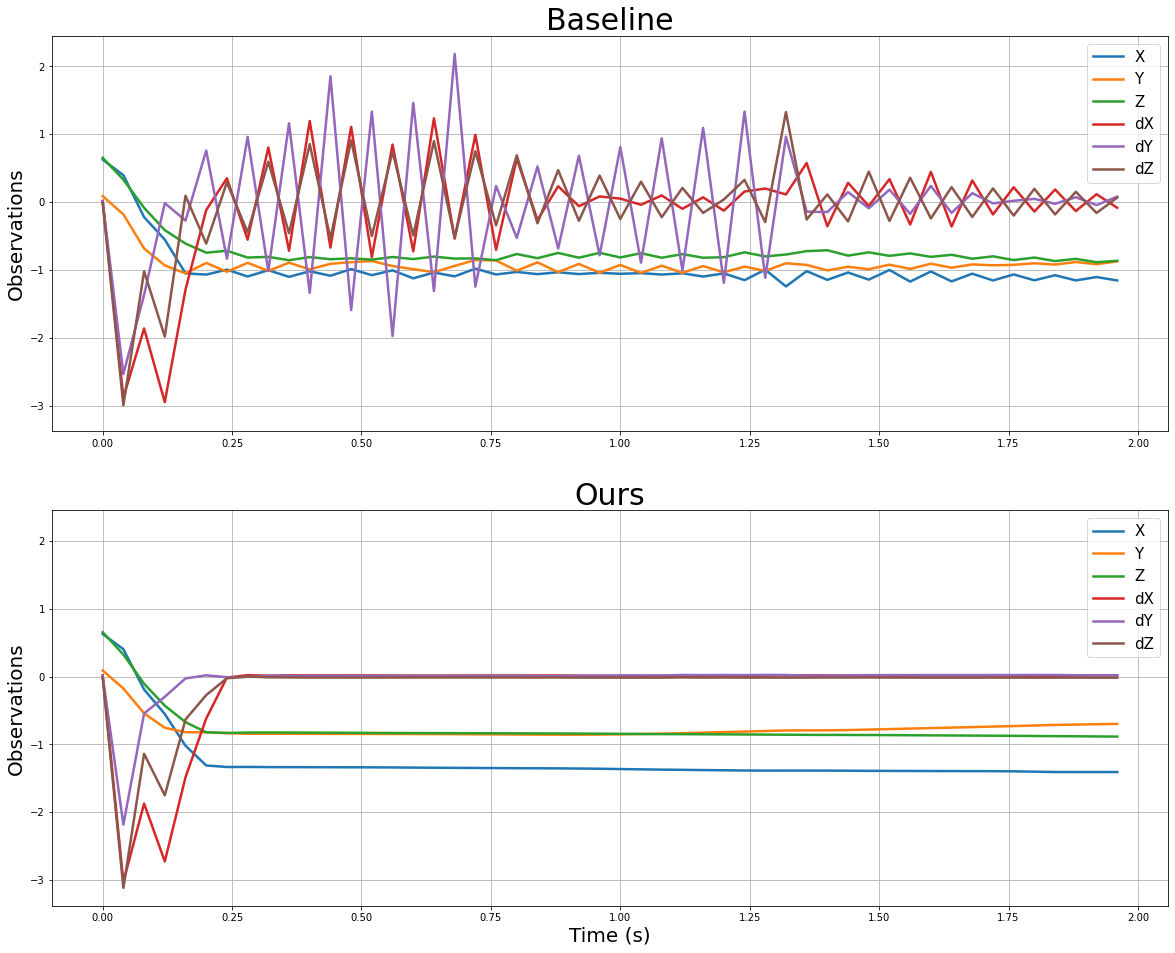

In [82]:
#env_name = 'Walker2DBulletEnv-v0'

env_name = "PandaReach-v1"
#env_name = "PandaPickAndPlace-v1"
#env_name = "PandaSlide-v1"
#env_name = "PandaReach-v1"

#env_name = "FetchReach-v1"




post_inv = ['original', 'DualRewardProd_adim_safe_stable_nolen']
#post_inv = post_list
#post_inv = ['original', 'DualRewardProd_adim_safe_stable_nolen', 'DualRewardDiv_adim_safe_stable_nolen']


figs, axs = plt.subplots(len(post_inv),1, figsize = (20,8*len(post_inv)), sharey=True)

#seed = np.random.randint(1,2**32-1)
env = env_dict['tqc'][env_name]
post_name = ["Baseline", "Ours"]

for i, post in enumerate(post_inv):
    model = model_dict['tqc'][env_name][post]
    obs,act,rew,info = do_rollout_stable(env, model, seed=seed)
    obs,ach,des = dict_to_array(obs)
    axs[i].title.set_text(post_name[i])
    axs[i].title.set_fontsize(30)
    
    axs[i].set_ylabel("Observations", fontsize=20)

    axs[i].plot([20*t/500 for t in range(50)], obs[:,:6], linewidth=2.5)
    axs[i].grid()
    axs[i].legend(["X", "Y", "Z", "dX", "dY", "dZ"], fontsize=15, loc='upper right')
    
#     axs[i,1].plot(ach)
#     axs[i,1].plot(des)
#     axs[i,1].grid()
    

    
axs[1].set_xlabel("Time (s)", fontsize=20)
    
    
    #axs[i].legend()
    #axs[i].set_label(post)

#from seagul.mesh import dict_to_array

In [4]:
# Hack for visualizing, can only load one environment / process with rendering. Need to restart NB to change the env

viz_env = "PandaPush-v1"
model_dict = {}
env_dict = {}

for algo_file in os.scandir(model_dir):
    algo_dir = algo_file.path
    algo = algo_dir.split("/")[-1]
    model_dict[algo] = {}
    env_dict[algo] = {}
    for env_file in os.scandir(algo_dir):
        env_dir = env_file.path
        env_name = env_dir.split("/")[-1]
        model_dict[algo][env_name] = {}
        env_dict[algo][env_name] = {}
        if viz_env in env_name:
        
            env, original_model = load_zoo_agent(env_name, algo, zoo_path = path_to_zoo, env_kwargs={"render":True})
            env_dict[algo][env_name] = env
            model_dict[algo][env_name]['original'] = original_model
            for pkl_file in os.scandir(env_dir):
                post_name = pkl_file.path.split("/")[-1].split(".")[0]
                model_dict[algo][env_name][post_name] = ALGOS[algo].load(pkl_file.path, env=env, device='cpu')

/home/sgillen/work/external/rl-baselines3-zoo//rl-trained-agents/tqc/PandaPush-v1_1/PandaPush-v1


In [28]:
#seed = np.random.randint(1,2**32-1)
env = env_dict['tqc'][viz_env]

model = model_dict['tqc'][viz_env][post_list[0]]
o,a,r,infp = do_rollout_stable(env, model, render=True, render_wait=.025, seed=seed)

# model = model_dict['tqc'][viz_env][post_list[1]]
# o,a,r,infp = do_rollout_stable(env, model, render=True, render_wait=.025, seed=seed)

model = model_dict['tqc'][viz_env][post_list[2]]
o,a,r,infp = do_rollout_stable(env, model, render=True, render_wait=.025, seed=seed)